##Assignment 10

You are provided with a dataset from USA Forensic Science Service
which has description of 6 types of glass; defined in terms of their
oxide content (i.e. Na, Fe, K, etc). Your task is to use K-Nearest
Neighbor (KNN) classifier to classify the glasses.
The original dataset is available at
(https://archive.ics.uci.edu/ml/datasets/glass+identification). For
detailed description on the attributes of the dataset,
please refer to the original link of the dataset in the UCI ML
repository.
But the shared drive folder have the dataset for your convenience

perform exploratory data analysis on the dataset using Python Pandas,
including dropping irrelevant fields for predicted values, and
standardization of each attribute.
Following data cleaning, two Scikit-Learn KNN models should be created
for two different distance metrics: Square Euclidean and Manhattan
distance. The performance of the two models using different distance
metrics should be compared in terms of accuracy to the test data and
Scikit-Learn Classification Report.

In [1]:
import pandas as pd
import numpy as np

In [4]:
train_df = pd.read_csv('/content/trainKNN.txt',sep=",",header=None,
                       names=["oxide1","oxide2","oxide3","oxide4","oxide5","oxide6","oxide7","oxide8","oxide9","oxide10","oxide11"])

In [5]:
train_df.head()

,oxide1,oxide2,oxide3,oxide4,oxide5,oxide6,oxide7,oxide8,oxide9,oxide10,oxide11
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
train_df.shape

(196, 11)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   oxide1   196 non-null    int64  
 1   oxide2   196 non-null    float64
 2   oxide3   196 non-null    float64
 3   oxide4   196 non-null    float64
 4   oxide5   196 non-null    float64
 5   oxide6   196 non-null    float64
 6   oxide7   196 non-null    float64
 7   oxide8   196 non-null    float64
 8   oxide9   196 non-null    float64
 9   oxide10  196 non-null    float64
 10  oxide11  196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB


In [9]:
train_df.isnull().sum()

oxide1     0
oxide2     0
oxide3     0
oxide4     0
oxide5     0
oxide6     0
oxide7     0
oxide8     0
oxide9     0
oxide10    0
oxide11    0
dtype: int64

In [10]:
train_df.describe()

,oxide1,oxide2,oxide3,oxide4,oxide5,oxide6,oxide7,oxide8,oxide9,oxide10,oxide11
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,102.862245,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,61.195663,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.000000,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,49.750000,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,101.500000,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,153.250000,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,211.000000,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [11]:
## test data 

test_df = pd.read_csv('/content/testKNN.txt',sep=",",header=None,
                       names=["oxide1","oxide2","oxide3","oxide4","oxide5","oxide6","oxide7","oxide8","oxide9","oxide10","oxide11"])

In [12]:
test_df.head()

,oxide1,oxide2,oxide3,oxide4,oxide5,oxide6,oxide7,oxide8,oxide9,oxide10,oxide11
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   oxide1   18 non-null     int64  
 1   oxide2   18 non-null     float64
 2   oxide3   18 non-null     float64
 3   oxide4   18 non-null     float64
 4   oxide5   18 non-null     float64
 5   oxide6   18 non-null     float64
 6   oxide7   18 non-null     float64
 7   oxide8   18 non-null     float64
 8   oxide9   18 non-null     float64
 9   oxide10  18 non-null     float64
 10  oxide11  18 non-null     int64  
dtypes: float64(9), int64(2)
memory usage: 1.7 KB


In [14]:
test_df.describe()

,oxide1,oxide2,oxide3,oxide4,oxide5,oxide6,oxide7,oxide8,oxide9,oxide10,oxide11
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,158.000000,1.519131,13.763333,1.873889,1.342222,72.820000,0.253889,9.460556,0.292778,0.130556,4.000000
std,46.209243,0.002791,1.083491,1.749753,0.581312,0.892004,0.265133,1.380432,0.617422,0.164798,2.222876
min,68.000000,1.511150,12.850000,0.000000,0.340000,71.360000,0.000000,6.650000,0.000000,0.000000,1.000000
25%,145.250000,1.517412,13.012500,0.000000,0.877500,72.212500,0.000000,8.635000,0.000000,0.000000,2.000000
50%,168.500000,1.519515,13.355000,2.395000,1.320000,72.685000,0.175000,9.065000,0.000000,0.015000,4.000000
75%,183.750000,1.521055,14.220000,3.570000,1.902500,73.382500,0.502500,10.090000,0.112500,0.240000,6.000000
max,214.000000,1.523000,17.380000,3.780000,2.170000,75.410000,0.760000,12.500000,1.670000,0.510000,7.000000


In [18]:
# slpiting
X_train=train_df.drop(columns=["oxide11"])
y_train=train_df["oxide11"]
X_test=test_df.drop(columns=["oxide11"])
y_test=test_df["oxide11"]

In [22]:
## sacling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler() # mean = 0 and deviation = 1,
sc.fit(X_train)
X_train= sc.transform(X_train)
sc.fit(X_test)
X_test= sc.transform(X_test)

In [25]:
## modling

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from scipy.sparse import csr_matrix


In [26]:
model = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)
model

KNeighborsClassifier(n_neighbors=4)

In [27]:
yhat=model.predict(X_test)
yhat

array([1, 1, 1, 2, 2, 2, 2, 2, 1, 5, 2, 5, 5, 2, 7, 7, 7, 7])

In [28]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9030612244897959
Test set Accuracy:  0.6111111111111112


In [29]:
k = 5
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))

Train set Accuracy:  0.923469387755102


In [30]:
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Test set Accuracy:  0.6666666666666666


In [31]:
K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))
ConfustionMx = [];
for n in range(1,K):
  
   #Train Model and Predict 
   neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
   yhat=neigh.predict(X_test)
   mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
 
  
   std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
 
mean_acc

array([0.72222222, 0.61111111, 0.66666667, 0.61111111, 0.66666667,
       0.66666667, 0.66666667, 0.66666667, 0.66666667])

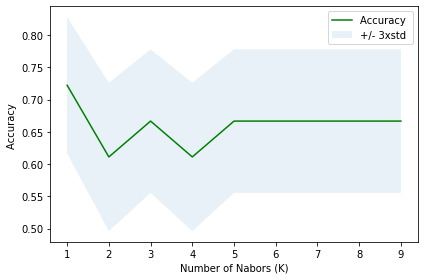

In [32]:
import matplotlib.pyplot as plt
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [34]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7222222222222222 with k= 1


In [ ]:
## The best score calculated with this data is 72% for Euclidean distance